In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [45]:
# 6mil nypd arrest records, 2006 through 2024
nycArrests = gpd.read_file('NYPD Arrests Data (Historic)_20250421.geojson')

In [46]:
nycArrests.head()

,perp_sex,latitude,arrest_precinct,y_coord_cd,jurisdiction_code,x_coord_cd,age_group,ky_cd,law_code,arrest_boro,longitude,ofns_desc,pd_desc,perp_race,law_cat_cd,arrest_key,pd_cd,arrest_date,geometry
0,M,40.753826,14,213913,0,989613,25-44,344,PL 1200001,M,-73.980643,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BLACK,M,298706301,101,2024-12-31,POINT (-73.98064 40.75383)
1,M,40.760533,109,216400,0,1030253,<18,126,PL 1707003,Q,-73.833942,MISCELLANEOUS PENAL LAW,"FORGERY-ILLEGAL POSSESSION,VEH",ASIAN / PACIFIC ISLANDER,F,298725483,724,2024-12-31,POINT (-73.83394 40.76053)
2,M,40.639439154957536,121,172284,0,938687,45-64,348,VTL05110MU,S,-74.16417173650933,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN",WHITE,M,298683707,922,2024-12-31,POINT (-74.16417 40.63944)
3,F,40.64936,67,175856,0,998286,25-44,343,PL 1650001,K,-73.949419,OTHER OFFENSES RELATED TO THEFT,"THEFT,RELATED OFFENSES,UNCLASS",BLACK,M,298692619,479,2024-12-31,POINT (-73.94942 40.64936)
4,M,40.666574,116,182237,0,1058380,45-64,344,PL 1200001,Q,-73.732786,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BLACK,M,298703594,101,2024-12-31,POINT (-73.73279 40.66657)


In [163]:
# filter to only last years of data, start 2021 to end 2024
time_threshold = pd.Timestamp("2024-01-01")
nycArrests1y = nycArrests.query('arrest_date > @time_threshold')
nycArrests1y.head()

,perp_sex,latitude,arrest_precinct,y_coord_cd,jurisdiction_code,x_coord_cd,age_group,ky_cd,law_code,arrest_boro,longitude,ofns_desc,pd_desc,perp_race,law_cat_cd,arrest_key,pd_cd,arrest_date,geometry
0,M,40.753826,14,213913,0,989613,25-44,344,PL 1200001,M,-73.980643,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BLACK,M,298706301,101,2024-12-31,POINT (-73.98064 40.75383)
1,M,40.760533,109,216400,0,1030253,<18,126,PL 1707003,Q,-73.833942,MISCELLANEOUS PENAL LAW,"FORGERY-ILLEGAL POSSESSION,VEH",ASIAN / PACIFIC ISLANDER,F,298725483,724,2024-12-31,POINT (-73.83394 40.76053)
2,M,40.639439154957536,121,172284,0,938687,45-64,348,VTL05110MU,S,-74.16417173650933,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN",WHITE,M,298683707,922,2024-12-31,POINT (-74.16417 40.63944)
3,F,40.64936,67,175856,0,998286,25-44,343,PL 1650001,K,-73.949419,OTHER OFFENSES RELATED TO THEFT,"THEFT,RELATED OFFENSES,UNCLASS",BLACK,M,298692619,479,2024-12-31,POINT (-73.94942 40.64936)
4,M,40.666574,116,182237,0,1058380,45-64,344,PL 1200001,Q,-73.732786,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BLACK,M,298703594,101,2024-12-31,POINT (-73.73279 40.66657)


In [164]:
# remove records where lat and long are both non zero
nycArrests1y = nycArrests1y.query('latitude != "0" & longitude != "0"')

In [165]:
# read pop estimate data
popEstimates = pd.read_csv('ACSDT5Y2020.B01003_2025-05-20T234802/ACSDT5Y2020.B01003-Data.csv', header=1)

In [166]:
popEstimates.head()

,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,Unnamed: 4
0,1400000US36001000100,"Census Tract 1, Albany County, New York",2029,355,NaN
1,1400000US36001000201,"Census Tract 2.01, Albany County, New York",3263,759,NaN
2,1400000US36001000202,"Census Tract 2.02, Albany County, New York",2153,488,NaN
3,1400000US36001000301,"Census Tract 3.01, Albany County, New York",3016,602,NaN
4,1400000US36001000302,"Census Tract 3.02, Albany County, New York",2931,509,NaN


In [167]:
# read 2020 census tract boundary data
tractBoundaries = gpd.read_file('2020 Census Tracts_20250521.geojson')

In [168]:
tractBoundaries.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry
0,1843004.52241,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),10833.0439286,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ..."
2,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ..."
3,2399276.86435,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.92117449,Manhattan,001800,MN0302,1,None,36061001800,1001800,MN03,18,"MULTIPOLYGON (((-73.98985 40.72052, -73.98972 ..."
4,1740173.87581,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5779.06260724,Manhattan,002201,MN0302,1,None,36061002201,1002201,MN03,22.01,"MULTIPOLYGON (((-73.97875 40.71993, -73.97879 ..."


In [169]:
# conform geoid column in tract boundaries to the geography geoid column in pop estimates
tractBoundaries['geoid'] = tractBoundaries['geoid'].map('1400000US{}'.format)

In [170]:
tractBoundaries.head(1)

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry
0,1843004.52241,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),10833.0439286,Manhattan,000100,MN0191,1,None,1400000US36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [171]:
# join census tract polygons with population estimates
tractPops = tractBoundaries.join(popEstimates.set_index('Geography'), on='geoid')
tractPops = tractPops.rename(columns={"Estimate!!Total": "popestimate"})
tractPops.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,Geographic Area Name,popestimate,Margin of Error!!Total,Unnamed: 4
0,1843004.52241,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),10833.0439286,Manhattan,000100,MN0191,1,None,1400000US36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...","Census Tract 1, New York County, New York",0,12,NaN
1,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,1400000US36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...","Census Tract 14.01, New York County, New York",2999,504,NaN
2,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,1400000US36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...","Census Tract 14.02, New York County, New York",2693,385,NaN
3,2399276.86435,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.92117449,Manhattan,001800,MN0302,1,None,1400000US36061001800,1001800,MN03,18,"MULTIPOLYGON (((-73.98985 40.72052, -73.98972 ...","Census Tract 18, New York County, New York",7101,1073,NaN
4,1740173.87581,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5779.06260724,Manhattan,002201,MN0302,1,None,1400000US36061002201,1002201,MN03,22.01,"MULTIPOLYGON (((-73.97875 40.71993, -73.97879 ...","Census Tract 22.01, New York County, New York",6372,814,NaN


In [182]:
tractPops['density'] = tractPops['popestimate']/tractPops['shape_area'].astype(float).astype(int)
tractPops.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry,Geographic Area Name,popestimate,Margin of Error!!Total,Unnamed: 4,density
0,1843004.52241,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),10833.0439286,Manhattan,000100,MN0191,1,None,1400000US36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...","Census Tract 1, New York County, New York",0,12,NaN,0.000000
1,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,1400000US36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...","Census Tract 14.01, New York County, New York",2999,504,NaN,0.002981
2,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,1400000US36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...","Census Tract 14.02, New York County, New York",2693,385,NaN,0.002196
3,2399276.86435,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.92117449,Manhattan,001800,MN0302,1,None,1400000US36061001800,1001800,MN03,18,"MULTIPOLYGON (((-73.98985 40.72052, -73.98972 ...","Census Tract 18, New York County, New York",7101,1073,NaN,0.002960
4,1740173.87581,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5779.06260724,Manhattan,002201,MN0302,1,None,1400000US36061002201,1002201,MN03,22.01,"MULTIPOLYGON (((-73.97875 40.71993, -73.97879 ...","Census Tract 22.01, New York County, New York",6372,814,NaN,0.003662


In [173]:
nycarrests.crs
tractBoundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

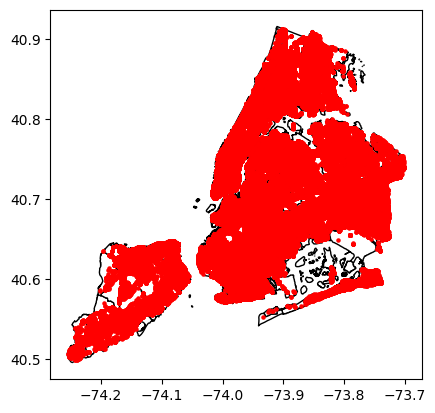

In [174]:
fig, ax = plt.subplots()
tractBoundaries.plot(ax=ax, color='white', edgecolor='black')
nycArrests4y.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

<Axes: >

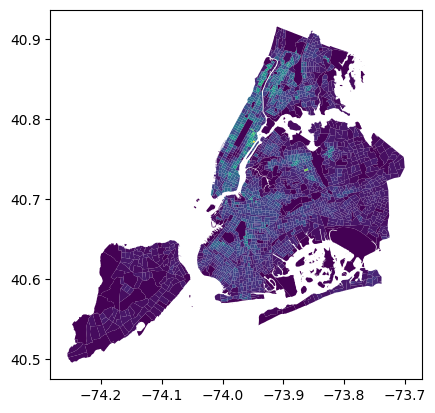

In [175]:
tractPops.plot(column = 'density')

In [183]:
tractPops.to_file('TractPops.geojson', driver='GeoJSON')

In [178]:
nycArrests1y.to_file('nycArrests1y.geojson', driver='GeoJSON')

In [56]:
NTA_Arrest_Counts = gpd.read_file('NTA_Arrest_Counts.geojson')
NTA_Arrest_Counts = NTA_Arrest_Counts.set_index(['ntaname', 'cdta2020'])

In [57]:
NTA_Arrest_Counts

,,shape_area,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,NUMPOINTS,geometry
ntaname,cdta2020,,,,,,,,,,,
Greenpoint,BK01,35321809.1041,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28919.5608108,Brooklyn,0,BK0101,3,047,Grnpt,705.0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
Williamsburg,BK01,28852852.7038,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28134.0823238,Brooklyn,0,BK0102,3,047,Wllmsbrg,1371.0,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
South Williamsburg,BK01,15208960.7339,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2805432,Brooklyn,0,BK0103,3,047,SWllmsbrg,458.0,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
East Williamsburg,BK01,52267407.9898,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.7989883,Brooklyn,0,BK0104,3,047,EWllmsbrg,1316.0,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
Brooklyn Heights,BK02,9982321.59069,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.5049745,Brooklyn,0,BK0201,3,047,BkHts,189.0,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
Freshkills Park (South),SI03,47758768.0799,SI03 South Shore (CD 3 Approximation),33945.4204211,Staten Island,9,SI0391,5,085,FrshklPK_S,9.0,"MULTIPOLYGON (((-74.20058 40.57951, -74.19888 ..."
Fort Wadsworth,SI95,9867248.986,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,14814.4147411,Staten Island,6,SI9561,5,085,FtWdswrth,7.0,"MULTIPOLYGON (((-74.05975 40.59385, -74.06013 ..."
Hoffman & Swinburne Islands,SI95,635701.967583,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,4743.12812675,Staten Island,9,SI9591,5,085,HffmnIsl,0.0,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [76]:
NTA_pops = gpd.read_file('Census_Demo_NTA.csv')
NTA_pops = NTA_pops.rename(columns={"Geographic Area - Neighborhood Tabulation Area (NTA)* Name": "NTAName", "Geographic Area - Neighborhood Tabulation Area (NTA)* Code": "NTACode"})
NTA_pops = NTA_pops.set_index(['NTAName', 'NTACode'])

In [77]:
NTA_pops

,,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
NTAName,NTACode,,,,,,
Claremont-Bathgate,BX01,Bronx,5,28149,31078,2929,10.4
Eastchester-Edenwald-Baychester,BX03,Bronx,5,35422,34517,-905,-2.6
Bedford Park-Fordham North,BX05,Bronx,5,55329,54415,-914,-1.7
Belmont,BX06,Bronx,5,25967,27378,1411,5.4
Bronxdale,BX07,Bronx,5,34309,35538,1229,3.6
...,...,...,...,...,...,...,...
Arden Heights,SI48,Staten Island,85,24996,25238,242,1
Great Kills,SI54,Staten Island,85,41680,40720,-960,-2.3
park-cemetery-etc-Staten Island,SI99,Staten Island,85,7,0,-7,-100


In [62]:
# join census tract polygons with population estimates
NTA_Arrest_Counts = NTA_Arrest_Counts.join(NTA_pops)
NTA_Arrest_Counts

,,shape_area,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,NUMPOINTS,geometry,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
ntaname,cdta2020,,,,,,,,,,,,,,,,,
Allerton,BX11,15753915.6386,BX11 Pelham Parkway-Morris Park (CD 11 Approxi...,17837.9372112,Bronx,0,BX1104,2,005,Allrtn,756.0,"MULTIPOLYGON (((-73.85849 40.87128, -73.85854 ...",NaN,NaN,NaN,NaN,NaN,NaN
Alley Pond Park,QN11,26132396.2376,QN11 Auburndale-Bayside-Douglaston (CD 11 Appr...,48184.4020895,Queens,9,QN1191,4,081,AllyPndPk,55.0,"MULTIPOLYGON (((-73.73374 40.74285, -73.7338 4...",NaN,NaN,NaN,NaN,NaN,NaN
Annadale-Huguenot-Prince's Bay-Woodrow,SI03,180426283.718,SI03 South Shore (CD 3 Approximation),67585.5453959,Staten Island,0,SI0304,5,085,Anndl_Wdrw,296.0,"MULTIPOLYGON (((-74.18073 40.54668, -74.18043 ...",NaN,NaN,NaN,NaN,NaN,NaN
Arden Heights-Rossville,SI03,67773961.1507,SI03 South Shore (CD 3 Approximation),38159.8608169,Staten Island,0,SI0303,5,085,ArdnHts,176.0,"MULTIPOLYGON (((-74.17758 40.56376, -74.17659 ...",NaN,NaN,NaN,NaN,NaN,NaN
Astoria (Central),QN01,21084822.0502,QN01 Astoria-Queensbridge (CD 1 Equivalent),21571.9909055,Queens,0,QN0103,4,081,Astr_C,511.0,"MULTIPOLYGON (((-73.91194 40.76901, -73.9145 4...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windsor Terrace-South Slope,BK07,15312193.2624,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,21233.3223806,Brooklyn,0,BK0701,3,047,WndsrTr,114.0,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",NaN,NaN,NaN,NaN,NaN,NaN
Woodhaven,QN09,23727497.0525,QN09 Kew Gardens-Richmond Hill-Woodhaven (CD 9...,21956.4211508,Queens,0,QN0905,4,081,Wdhvn,405.0,"MULTIPOLYGON (((-73.84914 40.69828, -73.84948 ...",NaN,NaN,NaN,NaN,NaN,NaN
Woodlawn Cemetery,BX12,17886378.9836,BX12 Wakefield-Williamsbridge-Eastchester (CD ...,18168.5908242,Bronx,7,BX1271,2,005,WdlnCem,106.0,"MULTIPOLYGON (((-73.87407 40.88004, -73.87495 ...",NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
NTA_Arrest_Counts

,,shape_area,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,NUMPOINTS,geometry,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
ntaname,cdta2020,,,,,,,,,,,,,,,,,
Allerton,BX11,15753915.6386,BX11 Pelham Parkway-Morris Park (CD 11 Approxi...,17837.9372112,Bronx,0,BX1104,2,005,Allrtn,756.0,"MULTIPOLYGON (((-73.85849 40.87128, -73.85854 ...",NaN,NaN,NaN,NaN,NaN,NaN
Alley Pond Park,QN11,26132396.2376,QN11 Auburndale-Bayside-Douglaston (CD 11 Appr...,48184.4020895,Queens,9,QN1191,4,081,AllyPndPk,55.0,"MULTIPOLYGON (((-73.73374 40.74285, -73.7338 4...",NaN,NaN,NaN,NaN,NaN,NaN
Annadale-Huguenot-Prince's Bay-Woodrow,SI03,180426283.718,SI03 South Shore (CD 3 Approximation),67585.5453959,Staten Island,0,SI0304,5,085,Anndl_Wdrw,296.0,"MULTIPOLYGON (((-74.18073 40.54668, -74.18043 ...",NaN,NaN,NaN,NaN,NaN,NaN
Arden Heights-Rossville,SI03,67773961.1507,SI03 South Shore (CD 3 Approximation),38159.8608169,Staten Island,0,SI0303,5,085,ArdnHts,176.0,"MULTIPOLYGON (((-74.17758 40.56376, -74.17659 ...",NaN,NaN,NaN,NaN,NaN,NaN
Astoria (Central),QN01,21084822.0502,QN01 Astoria-Queensbridge (CD 1 Equivalent),21571.9909055,Queens,0,QN0103,4,081,Astr_C,511.0,"MULTIPOLYGON (((-73.91194 40.76901, -73.9145 4...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windsor Terrace-South Slope,BK07,15312193.2624,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,21233.3223806,Brooklyn,0,BK0701,3,047,WndsrTr,114.0,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",NaN,NaN,NaN,NaN,NaN,NaN
Woodhaven,QN09,23727497.0525,QN09 Kew Gardens-Richmond Hill-Woodhaven (CD 9...,21956.4211508,Queens,0,QN0905,4,081,Wdhvn,405.0,"MULTIPOLYGON (((-73.84914 40.69828, -73.84948 ...",NaN,NaN,NaN,NaN,NaN,NaN
Woodlawn Cemetery,BX12,17886378.9836,BX12 Wakefield-Williamsbridge-Eastchester (CD ...,18168.5908242,Bronx,7,BX1271,2,005,WdlnCem,106.0,"MULTIPOLYGON (((-73.87407 40.88004, -73.87495 ...",NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
nta2010_polys = gpd.read_file('nta2010.geojson')
nta2010_polys = nta2010_polys.set_index(['NTAName', 'NTACode'])

In [87]:
nta2010_polys

,,OBJECTID,BoroCode,BoroName,CountyFIPS,Shape__Area,Shape__Length,geometry
NTAName,NTACode,,,,,,,
St. Albans,QN08,1,4,Queens,081,7.741275e+07,45401.316797,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
Mount Hope,BX41,2,2,Bronx,005,1.471671e+07,18937.248160,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
East Flushing,QN52,3,4,Queens,081,2.945368e+07,25848.545427,"POLYGON ((-73.79493 40.75781, -73.79475 40.755..."
Madison,BK44,4,3,Brooklyn,047,2.737916e+07,26237.257938,"POLYGON ((-73.93754 40.60857, -73.9383 40.6080..."
Kensington-Ocean Parkway,BK41,5,3,Brooklyn,047,1.589333e+07,20800.747734,"POLYGON ((-73.97084 40.64639, -73.97077 40.646..."
...,...,...,...,...,...,...,...,...
East Harlem North,MN34,191,1,Manhattan,061,2.450973e+07,30642.572373,"MULTIPOLYGON (((-73.93381 40.81652, -73.93383 ..."
Bushwick South,BK78,192,3,Brooklyn,047,4.016969e+07,40735.847464,"POLYGON ((-73.9323 40.70776, -73.93392 40.7075..."
Ocean Hill,BK79,193,3,Brooklyn,047,2.008969e+07,22493.714299,"POLYGON ((-73.90405 40.67923, -73.90349 40.678..."


In [94]:
nta2010_polys_pop = nta2010_polys.join(NTA_pops)
nta2010_polys_pop = nta2010_polys_pop.rename(columns={"Total Population 2010 Number": "population"})
nta2010_polys_pop = nta2010_polys_pop.drop(columns=['Total Population 2000 Number', 'Total Population Change 2000-2010 Number', 'Total Population Change 2000-2010 Percent'])

In [95]:
nta2010_polys_pop

,,OBJECTID,BoroCode,BoroName,CountyFIPS,Shape__Area,Shape__Length,geometry,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,population
NTAName,NTACode,,,,,,,,,,
Airport,QN98,75,4,Queens,081,2.282198e+08,136426.691291,"MULTIPOLYGON (((-73.74712 40.63717, -73.74707 ...",Queens,81,0
Allerton-Pelham Gardens,BX31,121,2,Bronx,005,3.168419e+07,25470.890216,"POLYGON ((-73.85364 40.87331, -73.85266 40.873...",Bronx,5,28903
Annadale-Huguenot-Prince's Bay-Eltingville,SI01,80,5,Staten Island,085,1.411882e+08,71302.665151,"POLYGON ((-74.16983 40.5611, -74.16984 40.5608...",Staten Island,85,27770
Arden Heights,SI48,41,5,Staten Island,085,5.041478e+07,29695.264637,"POLYGON ((-74.17185 40.56153, -74.17223 40.561...",Staten Island,85,25238
Astoria,QN70,61,4,Queens,081,3.933957e+07,32535.742240,"POLYGON ((-73.90203 40.76743, -73.90218 40.767...",Queens,81,78793
...,...,...,...,...,...,...,...,...,...,...,...
park-cemetery-etc-Bronx,BX99,187,2,Bronx,005,2.214386e+08,224656.441667,"MULTIPOLYGON (((-73.86956 40.81617, -73.86955 ...",Bronx,5,1906
park-cemetery-etc-Brooklyn,BK99,185,3,Brooklyn,047,2.253664e+08,385444.924683,"MULTIPOLYGON (((-73.91513 40.58628, -73.9151 4...",Brooklyn,47,418
park-cemetery-etc-Manhattan,MN99,178,1,Manhattan,061,9.148103e+07,154275.706660,"MULTIPOLYGON (((-74.01093 40.6845, -74.01193 4...",Manhattan,61,1849


In [96]:
nta2010_polys_pop.to_file('nta2010_polys_pop.geojson', driver='GeoJSON')


In [97]:
nta2020_arrest_counts = gpd.read_file('NTA_Arrest_Counts.geojson')

In [98]:
nta2020_arrest_counts

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,NUMPOINTS,geometry
0,35321809.1041,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28919.5608108,Brooklyn,0,BK0101,3,047,Grnpt,BK01,705.0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,28852852.7038,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28134.0823238,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,1371.0,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
2,15208960.7339,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2805432,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,458.0,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,52267407.9898,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.7989883,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,1316.0,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,9982321.59069,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.5049745,Brooklyn,0,BK0201,3,047,BkHts,BK02,189.0,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,47758768.0799,Freshkills Park (South),SI03 South Shore (CD 3 Approximation),33945.4204211,Staten Island,9,SI0391,5,085,FrshklPK_S,SI03,9.0,"MULTIPOLYGON (((-74.20058 40.57951, -74.19888 ..."
258,9867248.986,Fort Wadsworth,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,14814.4147411,Staten Island,6,SI9561,5,085,FtWdswrth,SI95,7.0,"MULTIPOLYGON (((-74.05975 40.59385, -74.06013 ..."
259,635701.967583,Hoffman & Swinburne Islands,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,4743.12812675,Staten Island,9,SI9591,5,085,HffmnIsl,SI95,0.0,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
260,10866804.1436,Miller Field,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,19197.2009732,Staten Island,9,SI9592,5,085,MllrFld,SI95,8.0,"MULTIPOLYGON (((-74.08469 40.57148, -74.08595 ..."


In [99]:
nta2020_food_insecurity = gpd.read_file('Emergency_Food_Supply_Gap_20250721.csv')

In [100]:
nta2020_food_insecurity

,Year,Neighborhood Tabulation Area NTA),Neighborhood Tabulation Area (NTA) Name,Supply Gap (lbs.),Food Insecure Percentage,Unemployment Rate,Vulnerable Population Percentage,Weighted Score,Rank
0,2024,BK0101,Greenpoint,846357.429014968,0.12,0.07,0.12,5.24287932147776,89
1,2024,BK0102,Williamsburg,1320190.80395303,0.16,0.06,0.13,6.01022316126955,33
2,2024,BK0103,South Williamsburg,1041816.43538328,0.14,0.09,0.08,6.16822447896195,28
3,2024,BK0104,East Williamsburg,3662415.68523959,0.35,0.06,0.12,8.28261390474052,1
4,2024,BK0201,Brooklyn Heights,328348.686293237,0.09,0.04,0.10,4.30632921294627,166
...,...,...,...,...,...,...,...,...,...
584,2022,SI37,Stapleton-Rosebank,-1157937.71037517,,0.10,,5.68225,163
585,2022,SI45,New Dorp-Midland Beach,425146.864108751,,0.09,,6.53875,99
586,2022,SI48,Arden Heights,376259.52,,0.08,,6.481,106
587,2022,SI54,Great Kills,489628.074508404,,0.09,,6.62625,85


In [133]:
nta2020_arrests_food = nta2020_arrest_counts.set_index('nta2020').join(nta2020_food_insecurity.set_index('Neighborhood Tabulation Area NTA)'))
nta2020_arrests_food = nta2020_arrests_food[nta2020_arrests_food['Year']  == '2024']
nta2020_arrests_food['Supply Gap (lbs.)'] = nta2020_arrests_food['Supply Gap (lbs.)'].astype(float)
nta2020_arrests_food['Food Insecure Percentage'] = nta2020_arrests_food['Food Insecure Percentage'].astype(float)
nta2020_arrests_food['Unemployment Rate'] = nta2020_arrests_food['Unemployment Rate'].astype(float)
nta2020_arrests_food['Vulnerable Population Percentage'] = nta2020_arrests_food['Vulnerable Population Percentage'].astype(float)
nta2020_arrests_food

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,borocode,countyfips,ntaabbrev,cdta2020,NUMPOINTS,geometry,Year,Neighborhood Tabulation Area (NTA) Name,Supply Gap (lbs.),Food Insecure Percentage,Unemployment Rate,Vulnerable Population Percentage,Weighted Score,Rank
BK0101,35321809.1041,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28919.5608108,Brooklyn,0,3,047,Grnpt,BK01,705.0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",2024,Greenpoint,8.463574e+05,0.12,0.07,0.12,5.24287932147776,89
BK0102,28852852.7038,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28134.0823238,Brooklyn,0,3,047,Wllmsbrg,BK01,1371.0,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4...",2024,Williamsburg,1.320191e+06,0.16,0.06,0.13,6.01022316126955,33
BK0103,15208960.7339,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2805432,Brooklyn,0,3,047,SWllmsbrg,BK01,458.0,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",2024,South Williamsburg,1.041816e+06,0.14,0.09,0.08,6.16822447896195,28
BK0104,52267407.9898,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.7989883,Brooklyn,0,3,047,EWllmsbrg,BK01,1316.0,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",2024,East Williamsburg,3.662416e+06,0.35,0.06,0.12,8.28261390474052,1
BK0201,9982321.59069,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.5049745,Brooklyn,0,3,047,BkHts,BK02,189.0,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",2024,Brooklyn Heights,3.283487e+05,0.09,0.04,0.10,4.30632921294627,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI0301,55937303.3368,Oakwood-Richmondtown,SI03 South Shore (CD 3 Approximation),44192.9039161,Staten Island,0,5,085,Okwd_Rmtwn,SI03,114.0,"MULTIPOLYGON (((-74.12154 40.57515, -74.12173 ...",2024,Oakwood-Richmondtown,3.500840e+05,0.09,0.06,0.09,5.08943033518437,102
SI0302,116746665.448,Great Kills-Eltingville,SI03 South Shore (CD 3 Approximation),67428.3746039,Staten Island,0,5,085,GrtKls_Evl,SI03,247.0,"MULTIPOLYGON (((-74.14439 40.56971, -74.14287 ...",2024,Great Kills-Eltingville,6.268679e+05,0.08,0.05,0.08,4.67062148507492,135
SI0303,67773961.1507,Arden Heights-Rossville,SI03 South Shore (CD 3 Approximation),38159.8608169,Staten Island,0,5,085,ArdnHts,SI03,176.0,"MULTIPOLYGON (((-74.17758 40.56376, -74.17659 ...",2024,Arden Heights-Rossville,4.015491e+05,0.06,0.05,0.08,4.4403027640458,157
SI0304,180426283.718,Annadale-Huguenot-Prince's Bay-Woodrow,SI03 South Shore (CD 3 Approximation),67585.5453959,Staten Island,0,5,085,Anndl_Wdrw,SI03,296.0,"MULTIPOLYGON (((-74.18073 40.54668, -74.18043 ...",2024,Annadale-Huguenot-Prince's Bay-Woodrow,7.603341e+05,0.10,0.03,0.07,4.60045211174574,143


In [134]:
nta2020_arrests_food.to_file('nta2020_arrests_food.geojson', driver='GeoJSON')

BK0101    8.463574e+05
BK0102    1.320191e+06
BK0103    1.041816e+06
BK0104    3.662416e+06
BK0201    3.283487e+05
              ...     
SI0301    3.500840e+05
SI0302    6.268679e+05
SI0303    4.015491e+05
SI0304    7.603341e+05
SI0305    4.793382e+05
Name: Supply Gap (lbs.), Length: 197, dtype: float64

In [131]:
nta2020_arrests_food

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,borocode,countyfips,ntaabbrev,cdta2020,NUMPOINTS,geometry,Year,Neighborhood Tabulation Area (NTA) Name,Supply Gap (lbs.),Food Insecure Percentage,Unemployment Rate,Vulnerable Population Percentage,Weighted Score,Rank
BK0101,35321809.1041,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28919.5608108,Brooklyn,0,3,047,Grnpt,BK01,705.0,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...",2024,Greenpoint,8.463574e+05,0.12,0.07,0.12,5.24287932147776,89
BK0102,28852852.7038,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28134.0823238,Brooklyn,0,3,047,Wllmsbrg,BK01,1371.0,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4...",2024,Williamsburg,1.320191e+06,0.16,0.06,0.13,6.01022316126955,33
BK0103,15208960.7339,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2805432,Brooklyn,0,3,047,SWllmsbrg,BK01,458.0,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...",2024,South Williamsburg,1.041816e+06,0.14,0.09,0.08,6.16822447896195,28
BK0104,52267407.9898,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.7989883,Brooklyn,0,3,047,EWllmsbrg,BK01,1316.0,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...",2024,East Williamsburg,3.662416e+06,0.35,0.06,0.12,8.28261390474052,1
BK0201,9982321.59069,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.5049745,Brooklyn,0,3,047,BkHts,BK02,189.0,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...",2024,Brooklyn Heights,3.283487e+05,0.09,0.04,0.10,4.30632921294627,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI0301,55937303.3368,Oakwood-Richmondtown,SI03 South Shore (CD 3 Approximation),44192.9039161,Staten Island,0,5,085,Okwd_Rmtwn,SI03,114.0,"MULTIPOLYGON (((-74.12154 40.57515, -74.12173 ...",2024,Oakwood-Richmondtown,3.500840e+05,0.09,0.06,0.09,5.08943033518437,102
SI0302,116746665.448,Great Kills-Eltingville,SI03 South Shore (CD 3 Approximation),67428.3746039,Staten Island,0,5,085,GrtKls_Evl,SI03,247.0,"MULTIPOLYGON (((-74.14439 40.56971, -74.14287 ...",2024,Great Kills-Eltingville,6.268679e+05,0.08,0.05,0.08,4.67062148507492,135
SI0303,67773961.1507,Arden Heights-Rossville,SI03 South Shore (CD 3 Approximation),38159.8608169,Staten Island,0,5,085,ArdnHts,SI03,176.0,"MULTIPOLYGON (((-74.17758 40.56376, -74.17659 ...",2024,Arden Heights-Rossville,4.015491e+05,0.06,0.05,0.08,4.4403027640458,157
SI0304,180426283.718,Annadale-Huguenot-Prince's Bay-Woodrow,SI03 South Shore (CD 3 Approximation),67585.5453959,Staten Island,0,5,085,Anndl_Wdrw,SI03,296.0,"MULTIPOLYGON (((-74.18073 40.54668, -74.18043 ...",2024,Annadale-Huguenot-Prince's Bay-Woodrow,7.603341e+05,0.10,0.03,0.07,4.60045211174574,143
